# use another position
- initial_state2, 2nd last is flipped
- has 2 circuits instead of 3 circuits.  11/16/2022

In [18]:
# !pip install pennylane
# !pip install pennylane-qiskit

In [19]:
# !pip install pennylane-lightning

In [20]:
# !pip install pennylane-lightning[gpu]  # has erro

In [21]:
import numpy as np
from pennylane.optimize import AdamOptimizer
from pennylane import numpy as qml_np
import pennylane as qml

import math
import matplotlib.pyplot as plt
import datetime

# 2nd last flipped

In [22]:
num_of_qubits = 1+12
N = 2**(num_of_qubits-2)


# initial_state2 = [1/math.sqrt(N)]*(N-2) + [0, 1/math.sqrt(N)] + [0]*(N-2) + [1/math.sqrt(N), 0] # 2**(num_qubits-1)
# initial_state_phi1 = initial_state2
# print(f'initial_state_phi1={initial_state_phi1}')
# initial_state_0_phi1  = initial_state_phi1 + [0]*len(initial_state_phi1) # 2**num_of_qubits
# print(initial_state_0_phi1)


In [23]:
# def oracle(init_state, num_qubits):
#     qml.QubitStateVector(np.array(init_state), wires=range(num_qubits))


In [24]:
# x=[]
# y=[]
# results = initial_state_0_phi1
# for i in range(len(results)):
#     if(np.linalg.norm(results[i])>0.01):
#          x.append(np.binary_repr(i,5))
#          y.append(results[i])
# plt.bar(x,y);
# plt.xlabel('states');
# plt.ylabel('probability');
# # plt.xticks(rotation=90);
# plt.show()

In [25]:
# x=[]
# y=[]
# results = initial_state_0_phi1
# for i in range(len(results)):
#     if(np.linalg.norm(results[i])>0.01):
#          x.append(np.binary_repr(i,6))
#          y.append(results[i])
# # plt.bar(x,y);




# # Figure Size
# fig, ax = plt.subplots(figsize =(16, 9))
 
# # Horizontal Bar Plot
# ax.barh(x, y)
 
# # Remove axes splines
# for s in ['top', 'bottom', 'left', 'right']:
#     ax.spines[s].set_visible(False)
 
# # Remove x, y Ticks
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')
 
# # Add padding between axes and labels
# ax.xaxis.set_tick_params(pad = 5)
# ax.yaxis.set_tick_params(pad = 10)
 
# # Add x, y gridlines
# ax.grid(b = True, color ='grey',
#         linestyle ='-.', linewidth = 0.5,
#         alpha = 0.2)
 
# # Show top values
# ax.invert_yaxis()
 
 

# plt.xlabel('states');
# plt.ylabel('probability');

# plt.show()

In [26]:
## three quantum circuits
def layer_with_HT(theta):
    for i in range(num_of_qubits-1):
        qml.CRY(theta[i], wires=(0,i+1))
    for i in range(num_of_qubits-2):
        qml.Toffoli(wires=(0,i+1,i+2))

        
def layer_no_HT(theta, qubit_posi):
    for i in range(num_of_qubits-1):
        qml.RY(theta[i], wires=(qubit_posi[i]))
    for i in range(num_of_qubits-2):
        qml.CNOT(wires=(qubit_posi[i],qubit_posi[i+1]))


In [27]:
device_name = 'default.qubit'  #'default.qubit' # 
device_name2 = 'default.qubit' # has qml.state()

In [28]:

        
# dev_with_HT=qml.device(device_name2, wires=num_of_qubits+1) #AerDevice(wires=num_of_qubits, shots=20000, backend='qasm_simulator')
dev_with_HT=qml.device(device_name, wires=num_of_qubits)
@qml.qnode(dev_with_HT)
def quantum_circuit_with_HT(theta):
    # initiate state vector |phi_1>
    
    # circuit for oracle
    # oracle(init_state=initial_state_0_phi1 ,num_qubits=num_of_qubits)
    for i in range(2,8):
            qml.Hadamard(wires=i)

    # 1-2
    qml.CNOT(wires=[2,8])
    qml.CNOT(wires=[3,8])
    # 1-3
    qml.CNOT(wires=[2,9])
    qml.CNOT(wires=[4,9])
    #1-4
    qml.CNOT(wires=[2,10])
    qml.CNOT(wires=[5,10])
    #4-5
    qml.CNOT(wires=[5,11])
    qml.CNOT(wires=[6,11])
    
    #5-6
    qml.CNOT(wires=[6,12])
    qml.CNOT(wires=[7,12])
    
    
    qml.MultiControlledX(control_wires=[8,9,10,11,12],control_values='11111',wires=1)
    
    
    
    qml.Hadamard(0)
    for theta_i in theta:
        layer_with_HT(theta_i)
    qml.Hadamard(0)    
    return qml.expval(qml.PauliZ(0)) 

print(qml.draw(quantum_circuit_with_HT)([[0.1]*(num_of_qubits-1)]))





 0: ──H──────────────────────────────────╭●────────╭●────────╭●────────╭●────────╭●────────╭●───────
 1: ──────────────────────────────────╭X─╰RY(0.10)─│─────────│─────────│─────────│─────────│────────
 2: ──H─╭●────╭●────╭●────────────────│────────────╰RY(0.10)─│─────────│─────────│─────────│────────
 3: ──H─│──╭●─│─────│─────────────────│──────────────────────╰RY(0.10)─│─────────│─────────│────────
 4: ──H─│──│──│──╭●─│─────────────────│────────────────────────────────╰RY(0.10)─│─────────│────────
 5: ──H─│──│──│──│──│──╭●─╭●──────────│──────────────────────────────────────────╰RY(0.10)─│────────
 6: ──H─│──│──│──│──│──│──│──╭●─╭●────│────────────────────────────────────────────────────╰RY(0.10)
 7: ──H─│──│──│──│──│──│──│──│──│──╭●─│─────────────────────────────────────────────────────────────
 8: ────╰X─╰X─│──│──│──│──│──│──│──│──├●────────────────────────────────────────────────────────────
 9: ──────────╰X─╰X─│──│──│──│──│──│──├●───────────────────────────────────────────────────

In [29]:

# dev_with_HTZ=qml.device(device_name2, wires=num_of_qubits+1) #AerDevice(wires=num_of_qubits, shots=20000, backend='qasm_simulator')
dev_with_HTZ=qml.device(device_name, wires=num_of_qubits)
@qml.qnode(dev_with_HTZ)
def quantum_circuit_with_HTZ(theta):
    
    
    # initiate state vector |phi_1>
    
    
    # circuit for oracle
    # oracle(init_state=initial_state_0_phi1 ,num_qubits=num_of_qubits)
    for i in range(2,8):
            qml.Hadamard(wires=i)

    # 1-2
    qml.CNOT(wires=[2,8])
    qml.CNOT(wires=[3,8])
    # 1-3
    qml.CNOT(wires=[2,9])
    qml.CNOT(wires=[4,9])
    #1-4
    qml.CNOT(wires=[2,10])
    qml.CNOT(wires=[5,10])
    #4-5
    qml.CNOT(wires=[5,11])
    qml.CNOT(wires=[6,11])
    
    #5-6
    qml.CNOT(wires=[6,12])
    qml.CNOT(wires=[7,12])
    
    
    qml.MultiControlledX(control_wires=[8,9,10,11,12],control_values='11111',wires=1)
    
    
    
    qml.Hadamard(0)
    for theta_i in theta:
        layer_with_HT(theta_i)
    qml.CZ([0,1])
    qml.Hadamard(0)    
    return qml.expval(qml.PauliZ(0)) 

print('newly added')
print(qml.draw(quantum_circuit_with_HTZ)([[0.1]*(num_of_qubits-1)]))



# dev_no_HT_Z=qml.device(device_name2, wires=num_of_qubits+1) #AerDevice(wires=num_of_qubits-1, shots=20000, backend='qasm_simulator')
dev_no_HT_Z=qml.device(device_name, wires=num_of_qubits-1)        
@qml.qnode(dev_no_HT_Z)
def quantum_circuit_no_HT_return_Z(theta):
    
    
    # initiate state vector |phi_1>
    # oracle(init_state=initial_state_phi1 ,num_qubits=num_of_qubits-1)
    
    # circuit for oracle
    for i in range(1,7):
            qml.Hadamard(wires=i)

    # 1-2
    qml.CNOT(wires=[1,7])
    qml.CNOT(wires=[2,7])
    # 1-3
    qml.CNOT(wires=[1,8])
    qml.CNOT(wires=[3,8])
    #1-4
    qml.CNOT(wires=[1,9])
    qml.CNOT(wires=[4,9])
    #4-5
    qml.CNOT(wires=[4,10])
    qml.CNOT(wires=[5,10])
    
    #5-6
    qml.CNOT(wires=[5,11])
    qml.CNOT(wires=[6,11])
    
    
    qml.MultiControlledX(control_wires=[7,8,9,10,11],control_values='11111',wires=0)
    
    for theta_i in theta:
        layer_no_HT(theta_i, list(range(num_of_qubits-1)))
    
    return qml.expval(qml.PauliZ(0))  
    # return qml.sample(qml.PauliZ(0)) 
print('newly added 2')   
print(qml.draw(quantum_circuit_no_HT_return_Z)([[0.2]*(num_of_qubits-1)]))



# dev_no_HT_S=qml.device(device_name2, wires=num_of_qubits+1) #AerDevice(wires=num_of_qubits-1, backend='qasm_simulator')
dev_no_HT_S=qml.device(device_name2, wires=num_of_qubits-1)  
@qml.qnode(dev_no_HT_S)
def quantum_circuit_no_HT_return_state(theta):
    # initiate state vector |phi_1>    
    # oracle(init_state=initial_state_phi1,num_qubits=num_of_qubits-1)
   
    # circuit for oracle
    for i in range(1,7):
            qml.Hadamard(wires=i)

    # 1-2
    qml.CNOT(wires=[1,7])
    qml.CNOT(wires=[2,7])
    # 1-3
    qml.CNOT(wires=[1,8])
    qml.CNOT(wires=[3,8])
    #1-4
    qml.CNOT(wires=[1,9])
    qml.CNOT(wires=[4,9])
    #4-5
    qml.CNOT(wires=[4,10])
    qml.CNOT(wires=[5,10])
    
    #5-6
    qml.CNOT(wires=[5,11])
    qml.CNOT(wires=[6,11])
    
    
    qml.MultiControlledX(control_wires=[7,8,9,10,11],control_values='11111',wires=0)
    
    for theta_i in theta:
        layer_no_HT(theta_i, list(range(num_of_qubits-1)))    
    return qml.state()

print('newly added 3')
print(qml.draw(quantum_circuit_no_HT_return_state)([[0.2]*(num_of_qubits-1)]))

newly added
 0: ──H──────────────────────────────────╭●────────╭●────────╭●────────╭●────────╭●────────╭●───────
 1: ──────────────────────────────────╭X─╰RY(0.10)─│─────────│─────────│─────────│─────────│────────
 2: ──H─╭●────╭●────╭●────────────────│────────────╰RY(0.10)─│─────────│─────────│─────────│────────
 3: ──H─│──╭●─│─────│─────────────────│──────────────────────╰RY(0.10)─│─────────│─────────│────────
 4: ──H─│──│──│──╭●─│─────────────────│────────────────────────────────╰RY(0.10)─│─────────│────────
 5: ──H─│──│──│──│──│──╭●─╭●──────────│──────────────────────────────────────────╰RY(0.10)─│────────
 6: ──H─│──│──│──│──│──│──│──╭●─╭●────│────────────────────────────────────────────────────╰RY(0.10)
 7: ──H─│──│──│──│──│──│──│──│──│──╭●─│─────────────────────────────────────────────────────────────
 8: ────╰X─╰X─│──│──│──│──│──│──│──│──├●────────────────────────────────────────────────────────────
 9: ──────────╰X─╰X─│──│──│──│──│──│──├●───────────────────────────────────────

In [30]:
coef2 = 1
def objective_fn(theta):
    val1_1 = quantum_circuit_with_HT(theta)
    val1_2 = quantum_circuit_with_HTZ(theta)
#     val2 = quantum_circuit_no_HT_return_Z(theta)
#     return coef2*val2-0.5*(val1_1 - val1_2)
    return -0.5*(val1_1 - val1_2)

In [31]:
max_repeat = 1 #100
iter_max = 300  #300
num_of_layers = 3
prb_last_list = []
obj_list_rep = []
theta_list = []
debug_flag, print_flag = 0, True
start_time = datetime.datetime.now()


probs_last = []


for rep in range(1,max_repeat+1):
    if print_flag:
        print(f'\n\nrep={rep}')
    else:
        print(f'\n\nrep={rep}', end='  ')
    
    optimizer = AdamOptimizer(0.05, beta1=0.9, beta2=0.999)
    theta=qml_np.random.uniform(0, 2*math.pi, size=(num_of_layers, num_of_qubits-1), requires_grad=True)
    obj_list = []
    for iter in range(1, iter_max+1):    
        theta, obj = optimizer.step_and_cost(objective_fn, theta)
        val1_1 = quantum_circuit_with_HT(theta)
        val1_2 = quantum_circuit_with_HTZ(theta)
        val2 = quantum_circuit_no_HT_return_Z(theta)
        if (iter==1 or iter%20==0 or iter==iter_max) and print_flag:
            print(f'iter={iter:3d} :: obj={obj:12.8f} :: val1_1={val1_1:12.8f} \
                 :: val1_2={val1_2:12.8f} :: val2={val2:12.8f}  \
                 coef2*val2-0.5*(val1_1 - val1_2)={coef2*val2-0.5*(val1_1 - val1_2):12.8f}  \
                 :: theta={theta}')
            # print(f'iter={iter:3d} :: obj={obj:12.8f} :: theta={theta}')
        obj_list.append(obj)
    theta_list.append(theta)
    print(f'obj_list(last 3)={obj_list[-3:]}')
    obj_list_rep.append(obj_list)
    
    ## display the amplified state
    state = quantum_circuit_no_HT_return_state(theta)
    prb = [i.item()**2 for i in state]
    # print(f'state={state}')
    probs_last = prb
    if len(prb)>20:
        print(f'prb(last 2)={prb[-2:]}')
    else:
        print(f'prb={prb}')
    prb_last_list.append(prb[-1])
    
    
    
    
    
end_time = datetime.datetime.now()
duration = end_time - start_time
duration_in_s = duration.total_seconds()
print(f'time consumed: {duration_in_s}s')



rep=1
iter=  1 :: obj= -0.00003413 :: val1_1= -0.00949697                  :: val1_2= -0.01110705 :: val2=  0.81972488                   coef2*val2-0.5*(val1_1 - val1_2)=  0.81891984                   :: theta=[[3.47859149 0.31389037 2.95061208 5.98121819 0.33281408 4.44628387
  4.06095418 2.18609506 2.92217245 4.57534596 0.35161103 3.07118466]
 [0.38421126 3.36223116 5.43006353 3.45652046 4.92447718 0.3959516
  2.46366621 1.23105573 0.28674026 3.41420923 3.02510455 0.66062859]
 [3.10689957 2.94954953 0.93996068 4.24508939 2.51306649 2.42312171
  6.07251678 5.81208614 5.35264414 6.27836341 2.10969525 0.71937126]]
iter= 20 :: obj= -0.01917371 :: val1_1=  0.00360041                  :: val1_2= -0.03603851 :: val2=  0.10450824                   coef2*val2-0.5*(val1_1 - val1_2)=  0.08468879                   :: theta=[[ 3.92672084 -0.58437626  3.03217714  6.2887444   0.2322479   4.83840731
   4.52666431  1.71553734  3.81599202  4.85034994 -0.13173349  2.61061106]
 [ 1.37340817  4.2791776

In [32]:
print('time now: ', end_time)
print(np.linalg.norm(1j))

time now:  2023-03-17 00:30:41.868400
1.0


In [33]:
# x=[]
# y=[]
# results = probs_last
# for i in range(len(results)):
#     if(np.linalg.norm(results[i])>0.01):
#          x.append(np.binary_repr(i,3))
#          y.append(results[i])
# plt.bar(x,y);
# plt.xlabel('states');
# plt.ylabel('probability');
# # plt.xticks(rotation=90);
# plt.show()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  


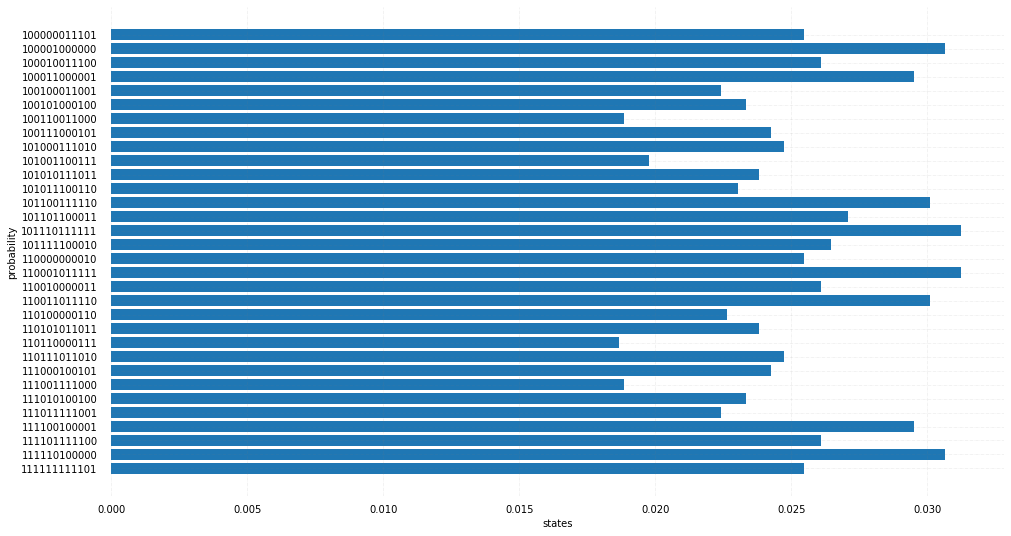

In [34]:
x=[]
y=[]
results = probs_last
for i in range(len(results)):
    if(np.linalg.norm(results[i])>0.01):
         x.append(np.binary_repr(i,6))
         y.append(results[i])
# plt.bar(x,y);




# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(x, y)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
 

plt.xlabel('states');
plt.ylabel('probability');

plt.show()